In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score 

In [2]:
df20 = pd.read_csv('feature20.csv')
df21 = pd.read_csv('feature21.csv')

In [3]:
df20.rename(columns={'x20':'x','y20':'y','z20':'z'},inplace=True)
df21.rename(columns={'x21':'x','y21':'y','z21':'z'},inplace=True)

In [4]:
X_train = df20[['x','y']]
y_train = df20[['z']]

X_test = df21[['x','y']]
y_test = df21[['z']]

In [5]:
y_test.head()

,z
0,red
1,green
2,red
3,red
4,red


In [6]:
y_test['z'][51]='red'

<ipython-input-6-f1b2112e0346>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['z'][51]='red'


In [7]:
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [8]:
model.coef_

array([[-120.32285734,  -11.78295991]])

In [9]:
model.intercept_

array([1.31090109])

In [10]:
from sklearn import metrics

In [11]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   z       52 non-null     object
dtypes: object(1)
memory usage: 544.0+ bytes


In [12]:
y_test.head()

,z
0,red
1,green
2,red
3,red
4,red


In [13]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8066666666666669


In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array(['red', 'red', 'green', 'red', 'green', 'green', 'green', 'red',
       'red', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'green',
       'red', 'red', 'red', 'green', 'red', 'green', 'red', 'red', 'red',
       'red', 'red', 'green', 'red', 'red', 'red', 'green', 'green',
       'red', 'red', 'red', 'green', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'red'],
      dtype='<U5')

In [16]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 1,  9],
       [12, 30]])

In [17]:
#Naive_Bayesian
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 1,  9],
       [11, 31]])

In [18]:
#Naive Bayesian using student-t distribution
from scipy import stats
# assume data is in array x
df, location , scale = stats.t.fit(X_train.all())
value = stats.t.pdf(X_test, location , scale)

In [19]:
#value

In [20]:
X_train = df20[['x','y','z']]
y_train = df20[['z']]

X_test = df21[['x','y','z']]
y_test = df21[['z']]
y_test['z'][51]='red'

<ipython-input-20-c97615f0e424>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['z'][51]='red'


<ipython-input-21-5d310b0bae69>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[f'y_pred_{i}'] = STNB(dof=i)


Accuracy: 0.6538461538461539


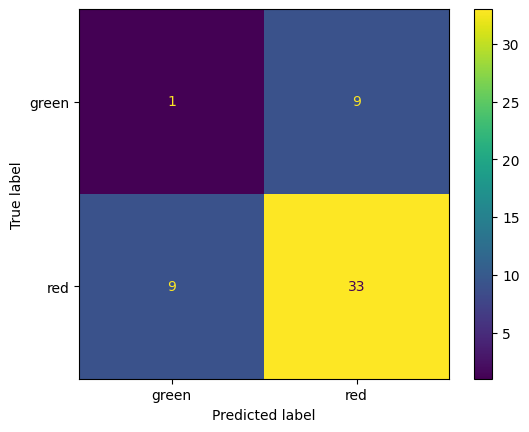

tpr 0.7857142857142857
fpr 0.9


<ipython-input-21-5d310b0bae69>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[f'y_pred_{i}'] = STNB(dof=i)


Accuracy: 0.7115384615384616


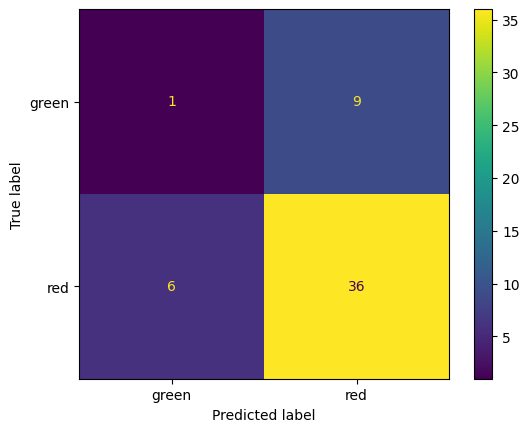

tpr 0.8571428571428571
fpr 0.9
Accuracy: 0.6538461538461539


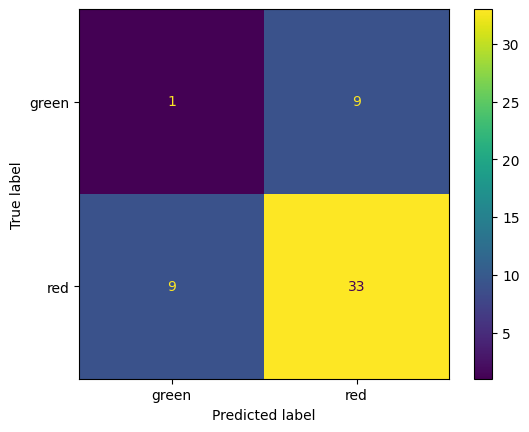

tpr 0.7857142857142857
fpr 0.9
best is dof is 1


In [21]:
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

def STNB(dof=0.5):

  for i in ['red','green']:
    globals()[f'X_mean_{i}_2021'] = X_train[X_train['z']==i]['x']
    globals()[f'X_variance_{i}_2021'] = X_train[X_train['z']==i]['y']


    globals()[f'{i}_2021_mean'] = stats.t.fit(globals()[f'X_mean_{i}_2021'])
    globals()[f'{i}_2021_variance'] = stats.t.fit(globals()[f'X_variance_{i}_2021'])


    globals()[f'p_{i}_mean'] = stats.t.pdf(X_test['x'],loc=globals()[f'{i}_2021_mean'][1], scale=globals()[f'{i}_2021_mean'][2], df=dof)
    globals()[f'p_{i}_variance'] = stats.t.pdf(X_test['y'],loc=globals()[f'{i}_2021_variance'][1], scale=globals()[f'{i}_2021_variance'][2], df=dof)

    globals()[f'p_{i}_2021'] = len(globals()[f'X_mean_{i}_2021']) / X_train.shape[0]

    globals()[f'posterior_{i}_2021'] = globals()[f'p_{i}_2021'] * globals()[f'p_{i}_mean'] * globals()[f'p_{i}_variance']



  labels_pred = []
  for i in range(0, len(posterior_red_2021)):
    if posterior_red_2021[i] > posterior_green_2021[i]:
      labels_pred.append('red')
    else:
      labels_pred.append('green')

  return labels_pred


for i in [0.5,1,5]:
  y_test[f'y_pred_{i}'] = STNB(dof=i) 

  accuracy = accuracy_score(y_test['z'],y_test[f'y_pred_{i}'])
  print("Accuracy:", accuracy)


  confusion_matrix = metrics.confusion_matrix(y_test['z'],y_test[f'y_pred_{i}']  )
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['green', 'red'])
  cm_display.plot()
  plt.show()

  # Compute the confusion matrix
  tn, fp, fn, tp = confusion_matrix[0][0] , confusion_matrix[0][1] , confusion_matrix[1][0] , confusion_matrix[1][1]

  # Calculate the true positive rate (TPR) and false positive rate (FPR)
  tpr = tp / (tp + fn)
  fpr = fp / (fp + tn)
  print('tpr' , tpr)
  print('fpr' , fpr)



print('best is dof is 1')
